## Exploratory Analysis - Police Use of Force (SF)

In the following notebook, we will be analyzing police use of force data in San Francisco. 

Raw data can be found [here](https://www.muckrock.com/foi/san-francisco-141/police-use-of-force-data-san-francisco-police-department-93028/#comms)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('white')
from matplotlib.lines import Line2D

In [2]:
#Read in data

path = 'C:\\Users\\sit_k\\Documents\\Python\\datasci-police-budget\\data\\raw_data.xlsx'


forceType = pd.read_excel(
    path, sheet_name='Force Type', parse_dates=['UOF DATE'])
incident = pd.read_excel(path, sheet_name='Incident', parse_dates=['UOF DATE'])
subject = pd.read_excel(path, sheet_name='Subject', parse_dates=['UOF DATE'])

In [3]:
print(forceType.shape)
print(incident.shape)
print(subject.shape)

(13424, 7)
(6250, 7)
(7074, 12)


## Incident Analysis

In [4]:
# Preview incident data
display(incident.shape)
incident.head()

(6250, 7)

,INCIDENT NUMBER,REPORT NUMBER,UOF DATE,INCIDENT TIME,LOCATION,ADDRESS,DISTRICT
0,UOF-2015-0034,150000102,2015-01-01,NaN,NaN,NaN,Central
1,UOF-2015-0003,150003128,2015-01-02,NaN,NaN,NaN,Southern
2,UOF-2015-0010,150003071,2015-01-02,NaN,NaN,NaN,Bayview
3,UOF-2015-0004,150004916,2015-01-03,NaN,NaN,NaN,Southern
4,UOF-2015-0005,150008112,2015-01-03,NaN,NaN,NaN,Southern


In [5]:
incident.tail()

,INCIDENT NUMBER,REPORT NUMBER,UOF DATE,INCIDENT TIME,LOCATION,ADDRESS,DISTRICT
6245,UOF-2020-0352,200305010,2020-05-19,15:32:00,NaN,"1700 Block of Visitation AVE San Francisco, CA...",Ingleside
6246,UOF-2020-0357,200305468,2020-05-19,23:45:00,NaN,"300 Block of San Miguel ST San Francisco, CA ...",Taraval
6247,UOF-2020-0358,200305731,2020-05-20,00:36:00,200 Block of Putnuim St.,NaN,Ingleside
6248,UOF-2020-0354,200133645,2020-05-20,09:45:00,Hyde St/ McAllister St,NaN,Tenderloin
6249,UOF-2020-0355,200307771,2020-05-20,19:42:00,Leavenworth at McAllister St,NaN,Tenderloin


In [6]:
incident.describe()

,INCIDENT NUMBER,REPORT NUMBER,UOF DATE,INCIDENT TIME,LOCATION,ADDRESS,DISTRICT
count,6250,6248.0,6250,5489,1822,3669,6220
unique,6250,6206.0,1857,1352,1556,2924,19
top,UOF-2019-0322,150478888.0,2016-06-25 00:00:00,20:00:00,6th St./Minna St.,"800 Block of Market St. San Francisco, CA",Mission
freq,1,3.0,11,24,8,13,1118
first,NaN,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-05-20 00:00:00,NaN,NaN,NaN,NaN


In [7]:
# clean up columns name to make it lower case and no space
incident.columns = incident.columns.str.lower().str.replace(' ', '_')

# keep data till Apr 2020 since May data were not complete
incident_filter = incident.query('uof_date < "2020-05-01"')

In [8]:
incident_filter.describe()

,incident_number,report_number,uof_date,incident_time,location,address,district
count,6220,6218.0,6220,5459,1807,3654,6190
unique,6220,6176.0,1840,1351,1542,2911,19
top,UOF-2019-0322,150478888.0,2016-06-25 00:00:00,20:00:00,6th St./Minna St.,"800 Block of Market St. San Francisco, CA",Mission
freq,1,3.0,11,24,8,13,1116
first,NaN,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-04-30 00:00:00,NaN,NaN,NaN,NaN


In [9]:
# data check to ensure no duplicate incident number
incident_filter.duplicated(subset=['incident_number']).sum()

0

In [10]:
incident_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6220 entries, 0 to 6219
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   incident_number  6220 non-null   object        
 1   report_number    6218 non-null   object        
 2   uof_date         6220 non-null   datetime64[ns]
 3   incident_time    5459 non-null   object        
 4   location         1807 non-null   object        
 5   address          3654 non-null   object        
 6   district         6190 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 388.8+ KB


In [11]:
incident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6250 entries, 0 to 6249
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   incident_number  6250 non-null   object        
 1   report_number    6248 non-null   object        
 2   uof_date         6250 non-null   datetime64[ns]
 3   incident_time    5489 non-null   object        
 4   location         1822 non-null   object        
 5   address          3669 non-null   object        
 6   district         6220 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 341.9+ KB


C:\Users\sit_k\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\sit_k\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


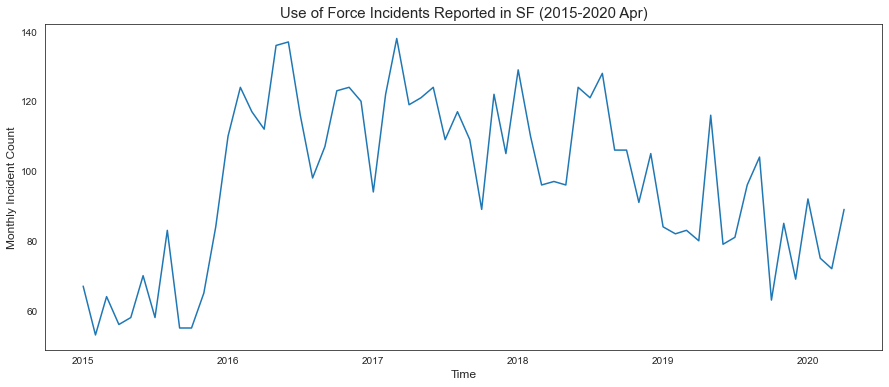

In [12]:
# Extract month/year data from UOF DATE

incident_filter.loc[:,
                    'month_year'] = incident_filter['uof_date'].dt.to_period('M')

# Plot incidents counts by monthYear

incident_ct = incident_filter.groupby('month_year', as_index=False)[
    'incident_number'].count()
incident_ct.columns = ['month_year', 'incident_counts']
incident_ct['month_year'] = pd.PeriodIndex(
    incident_ct['month_year']).to_timestamp()

plt.figure(figsize=(15, 6))
sns.lineplot(x='month_year', y='incident_counts', data=incident_ct)
plt.title('Use of Force Incidents Reported in SF (2015-2020 Apr)', fontsize=15)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Monthly Incident Count', fontsize=12)
plt.savefig('./graphs/images/SF_uof_monthly_15-20Apr.png')
plt.show()

**Observation**: There was a spike in incidents during 2016 to 2017, but show gradual decline from 2018 onward. 

#### Check Annual Incident Counts

C:\Users\sit_k\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\sit_k\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


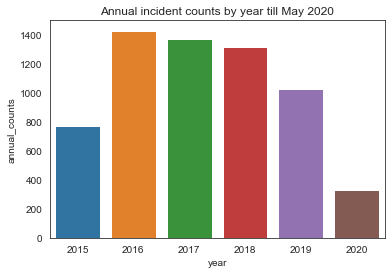

In [13]:
# Extract year data from UOF DATE

incident_filter.loc[:,
                    'year'] = incident_filter['uof_date'].dt.year

# Plot incidents counts by Year

incident_annual = incident_filter.groupby('year', as_index=False)[
    'incident_number'].count()
incident_annual.columns = ['year', 'annual_counts']

sns.barplot(x='year', y='annual_counts', data=incident_annual)
plt.title('Annual incident counts by year till May 2020')
plt.show()

In [14]:
by_district = incident_filter.groupby(['month_year', 'district'])[
    'incident_number'].size().unstack(-1)
by_district.fillna(0, inplace=True)

In [15]:
by_district.describe()

district,Airport,Bayview,Central,DOC,Gang Task Force,Ingleside,MCU,Mission,Narcotics,Northern,Outside SF,Park,Richmond,Southern,Special Investigations Division,Tactical,Taraval,Tenderloin,Traffic Company
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.078125,11.062500,10.937500,0.109375,0.046875,8.515625,0.015625,17.437500,0.062500,9.734375,1.109375,2.875000,4.015625,12.125000,0.031250,0.343750,4.343750,12.828125,0.046875
std,0.860134,5.294127,4.597705,0.403051,0.213042,3.817222,0.125000,5.701225,0.393398,3.797418,1.128522,1.803876,2.271229,4.627386,0.175368,1.157704,2.212653,4.993821,0.213042
min,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,7.000000,8.000000,0.000000,0.000000,5.000000,0.000000,13.000000,0.000000,6.750000,0.000000,1.000000,3.000000,9.000000,0.000000,0.000000,3.000000,9.750000,0.000000
50%,1.000000,11.000000,11.000000,0.000000,0.000000,8.000000,0.000000,17.000000,0.000000,10.000000,1.000000,3.000000,4.000000,12.000000,0.000000,0.000000,4.000000,13.000000,0.000000
75%,2.000000,14.000000,13.250000,0.000000,0.000000,11.000000,0.000000,21.250000,0.000000,12.000000,2.000000,4.000000,5.000000,15.000000,0.000000,0.000000,6.000000,16.000000,0.000000
max,3.000000,30.000000,22.000000,2.000000,1.000000,18.000000,1.000000,28.000000,3.000000,20.000000,4.000000,7.000000,10.000000,27.000000,1.000000,5.000000,9.000000,27.000000,1.000000


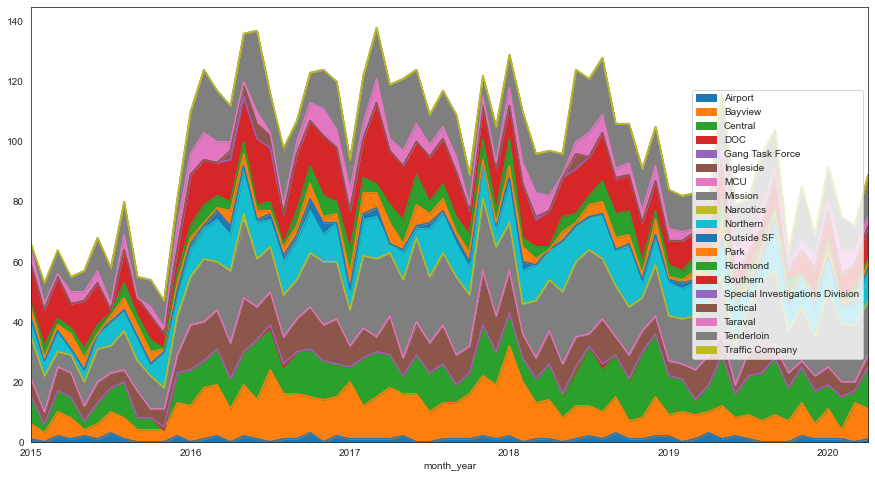

In [16]:
by_district.plot.area(figsize=(15, 8))
plt.legend(loc='right')

### Filter out the major district that have, on average, more than 5 incidents per month.

In [17]:
by_district.loc[:, 'ttl'] = by_district.sum(axis=1)

In [18]:
by_district_select = by_district[by_district.columns[by_district.mean(
    axis=0) > 5]]

In [19]:
by_district_select.loc[:, 'other'] = by_district_select.loc[:,
                                                            'ttl'] - by_district_select.iloc[:, -1]

C:\Users\sit_k\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\sit_k\anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [20]:
final_by_district = by_district_select.drop(['ttl'], axis=1)

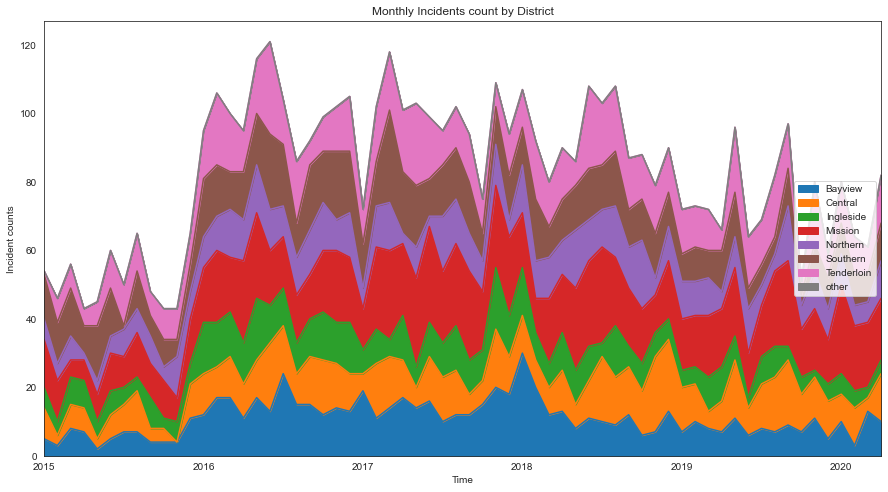

In [21]:
final_by_district.plot.area(figsize=(15, 8))
plt.legend(loc='right')
plt.title('Monthly Incidents count by District')
plt.xlabel('Time')
plt.ylabel('Incident counts')
plt.show()

In [22]:
pct_by_district = final_by_district.div(final_by_district.sum(axis=1), axis=0)

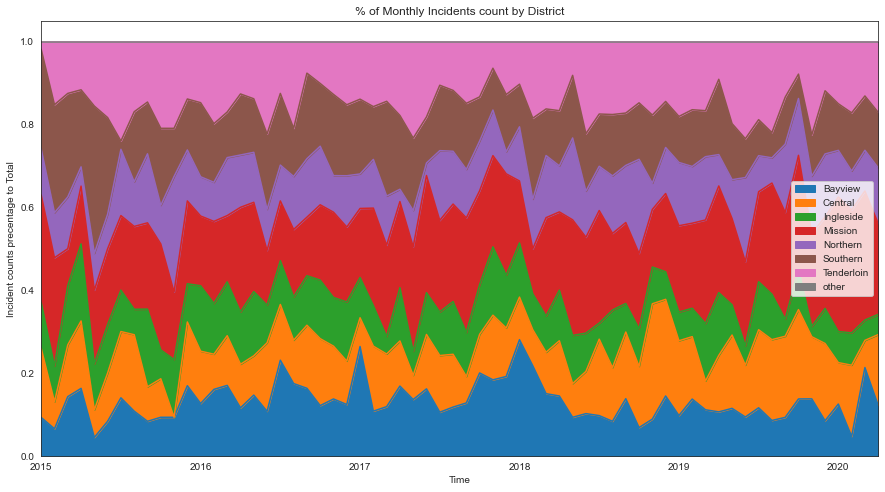

In [23]:
pct_by_district.plot.area(figsize=(15, 8))
plt.legend(loc='right')
plt.title('% of Monthly Incidents count by District')
plt.xlabel('Time')
plt.ylabel('Incident counts precentage to Total')
plt.show()

**Observation**: Top incident region are Mission, Bayview, and Tenderloin.

## Subject Analysis

In [24]:
# Preview subject data
display(subject.shape)
subject.head()

(7074, 12)

,INCIDENT NUMBER,REPORT NUMBER,UOF DATE,SUBJECT NUMBER,SUBJECT RACE,SUBJECT AGE,SUBJECT SEX,WEAPON TYPE,TYPE OF WEAPON(OTHER),COMPLAINT OF PAIN,SUBJECT INJURED,CHARGES
0,UOF-2015-0034,150000102,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UOF-2015-0003,150003128,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UOF-2015-0010,150003071,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UOF-2015-0004,150004916,2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UOF-2015-0005,150008112,2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
subject.columns = subject.columns.str.lower().str.replace(' ', '_')

In [26]:
subject.tail()

,incident_number,report_number,uof_date,subject_number,subject_race,subject_age,subject_sex,weapon_type,type_of_weapon(other),complaint_of_pain,subject_injured,charges
7069,UOF-2020-0347,200300189,2020-05-17,29394.0,W - White,52,M,NaN,NaN,No,Yes,NaN
7070,UOF-2020-0357,200305468,2020-05-19,29405.0,H - Hispanic,38,M,NaN,NaN,No,No,422 PC
7071,UOF-2020-0358,200305731,2020-05-20,29406.0,H - Hispanic,18,M,NaN,NaN,No,No,NaN
7072,UOF-2020-0354,200133645,2020-05-20,29403.0,H - Hispanic,25,M,NaN,NaN,Yes,No,Warrant
7073,UOF-2020-0355,200307771,2020-05-20,29404.0,W - White,34,M,Replica Firearm,NaN,No,No,12556 PC


In [27]:
subject['subject_race'].fillna('U - Unknown', inplace=True)
subject['subject_race'].unique()

array(['U - Unknown', 'W - White', 'B - Black', 'H - Hispanic',
       'I - American Indian', 'A - Asian or Pacific Islander'],
      dtype=object)

In [28]:
subject_filt = subject.query('uof_date < "2020-05-01"')

C:\Users\sit_k\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\sit_k\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


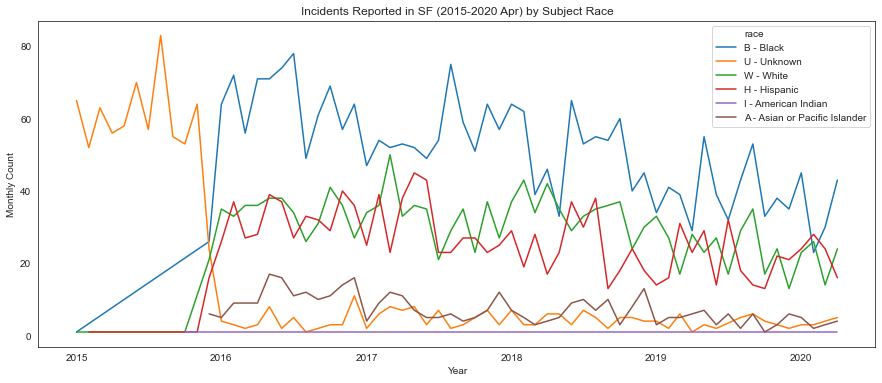

In [29]:
# Extract month/year data from UOF DATE

subject_filt.loc[:, 'month_year'] = subject_filt['uof_date'].dt.to_period('M')

# Plot incidents counts by monthYear

subject_ct = subject_filt.groupby(['month_year', 'subject_race'], as_index=False)[
    'incident_number'].count()
subject_ct.columns = ['month_year', 'race', 'incident_counts']
subject_ct['month_year'] = pd.PeriodIndex(
    subject_ct['month_year']).to_timestamp()

plt.figure(figsize=(15, 6))
sns.lineplot(x='month_year', y='incident_counts', data=subject_ct, hue='race')
plt.title('Incidents Reported in SF (2015-2020 Apr) by Subject Race')
plt.xlabel('Year')
plt.ylabel('Monthly Count')
plt.show()

**Observation**: Data prior to 2016 appear to be missing out a lot of value on race, hence the race composition during that time won't be reliable. In general, Black has highest occurrence as the incident subject.

In [30]:
subject['subject_age'].fillna('Unkno', inplace=True)
subject['subject_age'].unique()

array(['Unkno', 32, 37, 20, 30, 24, 27, 26, 25, 29, 43, 45, 60, 39, 31,
       23, 33, 28, 58, 21, 53, 48, 40, 36, 50, 67, 34, 59, 'Unk', 'unk',
       19, 38, 44, 22, 46, 61, 18, 52, 78, 71, 35, 49, 'UNK', 54, 65, 57,
       62, 41, 47, 42, 51, 56, 55, 75, 66, 81, 69, 64, 63, 83, 68, 80, 86,
       74, 79, 72, 77, 70, 73, 76], dtype=object)

In [31]:
len(subject['subject_age'])

7074

In [32]:
subject['subject_age'].value_counts()

Unkno    810
26       265
27       243
24       239
25       235
        ... 
79         1
80         1
81         1
86         1
76         1
Name: subject_age, Length: 70, dtype: int64

In [33]:
age_series = subject['subject_age'].apply(
    lambda x: pd.to_numeric(x, errors='coerce')).dropna()

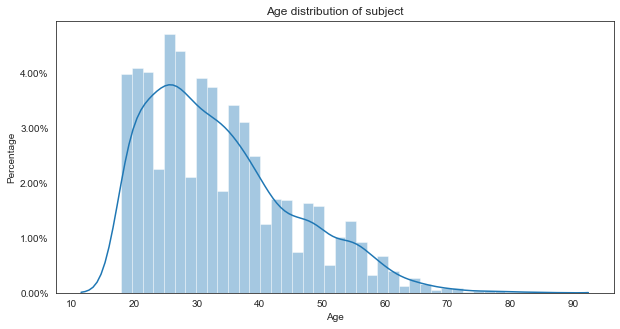

In [34]:
plt.figure(figsize=(10, 5))
ax = sns.distplot(age_series)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Age distribution of subject')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

**Observation**: subject age primarily lie between 20-40.

## Force Type Analysis

In [35]:
# Preview forceType data
display(forceType.shape)
forceType.head()

(13424, 7)

,UOF DATE,INCIDENT NUMBER,REPORT NUMBER,EMPLOYEE NUMBER,SUBJECT NUMBER,FORCE DESC,FORCE USED OTHER
0,2015-01-01,UOF-2015-0034,150000102,17169.0,NaN,UNKNOWN,NaN
1,2015-01-02,UOF-2015-0003,150003128,12294.0,NaN,UNKNOWN,NaN
2,2015-01-02,UOF-2015-0003,150003128,13423.0,NaN,UNKNOWN,NaN
3,2015-01-02,UOF-2015-0010,150003071,10782.0,NaN,UNKNOWN,NaN
4,2015-01-02,UOF-2015-0010,150003071,12281.0,NaN,UNKNOWN,NaN


In [36]:
forceType.columns = forceType.columns.str.lower().str.replace(' ', '_')

In [37]:
forceType['force_desc'].value_counts()

Pointing of Firearms     7468
Physical Control         2965
Strike by Object/Fist    1150
UNKNOWN                   974
Impact Weapon             301
OC                        210
ERIW                      146
Other                     114
Firearm                    45
Spike Strips               31
Carotid                    14
Vehicle Deflection          4
K-9                         2
Name: force_desc, dtype: int64

In [38]:
forceType.loc[:'2015-12-31', 'force_desc'].value_counts()

UNKNOWN                  974
Pointing of Firearms     699
Physical Control         209
Strike by Object/Fist     69
OC                        26
Impact Weapon             21
Firearm                    9
Carotid                    5
Other                      2
ERIW                       2
Name: force_desc, dtype: int64

#### Pick top 3 categories for cleaner visualization purposes.

In [39]:
top_3_force = forceType.loc[np.where((forceType['force_desc'] == 'Pointing of Firearms') | (
    forceType['force_desc'] == 'Physical Control') | (
    forceType['force_desc'] == 'Strike by Object/Fist'))]

In [40]:
top_3_force['force_desc'].value_counts()

Pointing of Firearms     7468
Physical Control         2965
Strike by Object/Fist    1150
Name: force_desc, dtype: int64

In [41]:
top_3_force['year'] = top_3_force['uof_date'].dt.year

In [42]:
# Get counts of incidents by race and type of force used

uof_year = top_3_force.groupby(['year', 'force_desc'], as_index=False)[
    'incident_number'].count()

uof_year.columns = ['year', 'Force Description', 'incident_count']

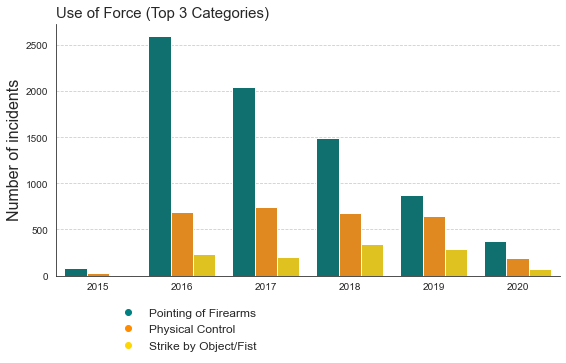

In [43]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='year', y='incident_count', hue='Force Description', data=uof_year,
                 hue_order=['Pointing of Firearms', 'Physical Control', 'Strike by Object/Fist'], palette=['teal', 'darkorange', 'gold'])
# ax.set(yticklabels=[])
ax.tick_params(left=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_position([0.1,0.23,0.7,0.7])


plt.grid(linestyle='--', axis='y')
plt.title('Use of Force (Top 3 Categories)', loc='left', fontsize=15)
plt.xlabel('')
plt.ylabel('Number of incidents', fontsize=16)


legend_elements = [Line2D([0], [0], color='teal', marker='o', ls='', label='Pointing of Firearms'),
                   Line2D([0], [0], marker='o', color='darkorange', ls='', label='Physical Control'),                          
                   Line2D([0], [0], marker='o', color='gold', ls='', label='Strike by Object/Fist')]


plt.legend(handles=legend_elements, bbox_to_anchor=(.05, .01),
           loc=2, borderaxespad=2.5, frameon=False, fontsize=12)

plt.savefig('./graphs/images/SF_uof_annual.png')
plt.show()